# Titanic Passenger Survival Prediction

The sinking of the Titanic is one of the most famous disasters, with varying statistics on the number of casualties. Currently, we have obtained some data in CSV format, consisting of two files:

- train.csv: training dataset containing feature information and survival labels;
- test.csv: testing dataset containing only feature information.

Now, we need to use a decision tree classifier to train on the training set and predict the survival status of passengers in the test set while providing the accuracy of the classifier.

In [24]:
# Dependence
import pandas as pd
from sklearn.feature_extraction import DictVectorizer
from sklearn.tree import DecisionTreeClassifier
import numpy as np
from sklearn.model_selection import cross_val_score
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

from warnings import filterwarnings
filterwarnings('ignore')    # ignore the warning

In [25]:
## Load the data

train_data_file_path = './DataSource/titanic_train.csv'
test_data_file_path = './DataSource/titanic_test.csv'

train_data = pd.read_csv(train_data_file_path, encoding = 'utf-8')
test_data = pd.read_csv(test_data_file_path, encoding = 'utf-8')

train_data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


## Step1: Data exploration

In [26]:
# Use info() to understand the basic situation of the data table: number of rows, 
# number of columns, data type of each column, and data completeness.

train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [27]:
# Use describe() to understand the statistical information of the data table: count, mean, 
# standard deviation, minimum, maximum, etc.

train_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [28]:
# Use describe(include=['O']) to view the overall situation of string types (non-numeric).
train_data.describe(include=['O'])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Braund, Mr. Owen Harris",male,347082,B96 B98,S
freq,1,577,7,4,644


In [29]:
# Use head to view the first few rows of data (default is the first 5 rows).
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [30]:
# Use tail to view the last few lines of data (default is the last 5 lines).
train_data.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [31]:
# Calculate the number of null or NaN values in the data and their proportion.

# Calculate the number of empty values in each column
null_counts = train_data.isnull().sum()

# Calculate the total counts 
total_counts = train_data.shape[0]

# Calculate the proportion
null_percentage = null_counts / total_counts * 100

# Review the results
null_percentage

PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            19.865320
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
Cabin          77.104377
Embarked        0.224467
dtype: float64

# Insights:

Through data exploration, we found that there are missing values in the three fields: **Age, Fare, and Cabin**. 

- Age is an age field, numeric, and can be filled with the average value;

- Embarked for the port of disembarkation, with a small number of missing values.

- The Cabin field has a significant number of missing values, accounting for 77% in the training dataset, and cannot be filled.

## Step2: Data Cleaning

In [32]:
# Use the average age to fill in the nan values in age.

train_data['Age'].fillna(train_data['Age'].mean(), inplace=True)
test_data['Age'].fillna(test_data['Age'].mean(), inplace=True)

train_data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.000000,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.000000,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29.699118,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.000000,0,0,111369,30.0000,C148,C


In [33]:
# First, observe the values of the Embarked field.
train_data['Embarked'].value_counts()

Embarked
S    644
C    168
Q     77
Name: count, dtype: int64

In [34]:
# Use the most frequently logged port to fill in the nan values of the login port.
train_data['Embarked'].fillna('S', inplace=True)

test_data['Embarked'].fillna('S', inplace=True)

# Review
train_data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.000000,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.000000,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29.699118,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.000000,0,0,111369,30.0000,C148,C


## Step3: Feature engineering

Feature selection is key to classifiers, and different feature selections can lead to different classification results.

Through data exploration, we found that:

- PassengerId and Name have no impact on classification and can be discarded; the Cabin field has too many missing values and should also be abandoned; the Ticket field is chaotic and irregular, so it can likewise be discarded.

- The remaining fields include: Pclass, Sex, Age, SibSp, Parch, and Fare. These attributes represent the passenger's ticket class, gender, age, number of siblings/spouses aboard, number of parents/children aboard, and ticket price respectively, which may be related to predicting passenger survival.

Based on this foundation, we use feature selection for processing.

In [35]:
# Feature engineering
features = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']
train_features = train_data[features]
train_labels = train_data['Survived']
test_features = test_data[features]

In [36]:
# Convert string-type feature values to numeric type.
dvec = DictVectorizer(sparse=False)

# Fixing the orient parameter to 'records'
train_features = dvec.fit_transform(train_features.to_dict(orient='records'))

In [37]:
print(dvec.feature_names_)

['Age', 'Embarked=C', 'Embarked=Q', 'Embarked=S', 'Fare', 'Parch', 'Pclass', 'Sex=female', 'Sex=male', 'SibSp']


In [38]:
# Review
train_features.shape

(891, 10)

Thus, the train_features feature matrix includes 10 feature values (columns) and 891 samples (rows), that is, a feature matrix with 891 rows and 10 columns.

## Step 4: Decision tree model

We now use the ID3 algorithm, set criterion='entropy' when creating the DecisionTreeClassifier, and then train it using the fit method by passing in the feature matrix and classification labels to obtain the decision tree classifier.

In [39]:
# Construct ID3 decision tree
clf = DecisionTreeClassifier(criterion='entropy')

In [40]:
# traning
clf.fit(train_features, train_labels)


DecisionTreeClassifier(criterion='entropy')

## Step 5: Model Prediction and Evaluation

In the prediction process, we first need to obtain the feature value matrix of the test set, and then use the trained decision tree clf to make predictions, resulting in predicted labels pred_labels:

In [41]:
test_features = dvec.transform(test_features.to_dict(orient='records'))

# prediction
pred_labels = clf.predict(test_features)

In [42]:
# Assessment accuracy

acc_decision_tree = round(clf.score(train_features, train_labels), 6)
print(u'score =  %.4lf' % acc_decision_tree)

score =  0.9820


### Insights

You will find that after training with the training set and then evaluating the accuracy using the same training set, the accuracy will naturally be very high. However, this level of accuracy does not represent the true performance of the decision tree classifier. 

Since we do not have actual results for the test set, we cannot compare the predicted results of the test set with actual outcomes. If using the score function shows that the accuracy on the training set is close to 100% (as shown above at 98.2%), it does not reflect how well the classifier performs in a real-world environment.

### K-fold cross-validation

Cross-validation is a commonly used method for validating classification accuracy, based on the principle of using most samples for training and a small number of samples for validating the classifier. K-fold cross-validation involves performing K rounds of cross-validation, where in each round, one K-th of the data is selected as the validation set and the remaining data as the training set, rotating through K times and calculating the average.

The principles of K-fold cross-validation are:
1. Divide the dataset into K equal parts;
2. Use one part as the test set and the rest as the training set;
3. Calculate test accuracy;
4. Change the test set and repeat steps 2 and 3.

In [43]:
# K-fold cross-validation
print(u'cross_val_score = %.4lf' % np.mean(cross_val_score(clf, train_features, train_labels, cv=10)))

cross_val_score = 0.7756


### Insights

You can see that the accuracy of the score function is 0.9820, while the accuracy of cross_val_score is 0.7835. It is clear here that for cases where the actual results of the test set are unknown, K-fold cross-validation must be used to determine the model's accuracy.

## Step6: Decision Tree Visualization

This step requires the Graphviz library. If it is not installed, please install it using pip install graphviz.

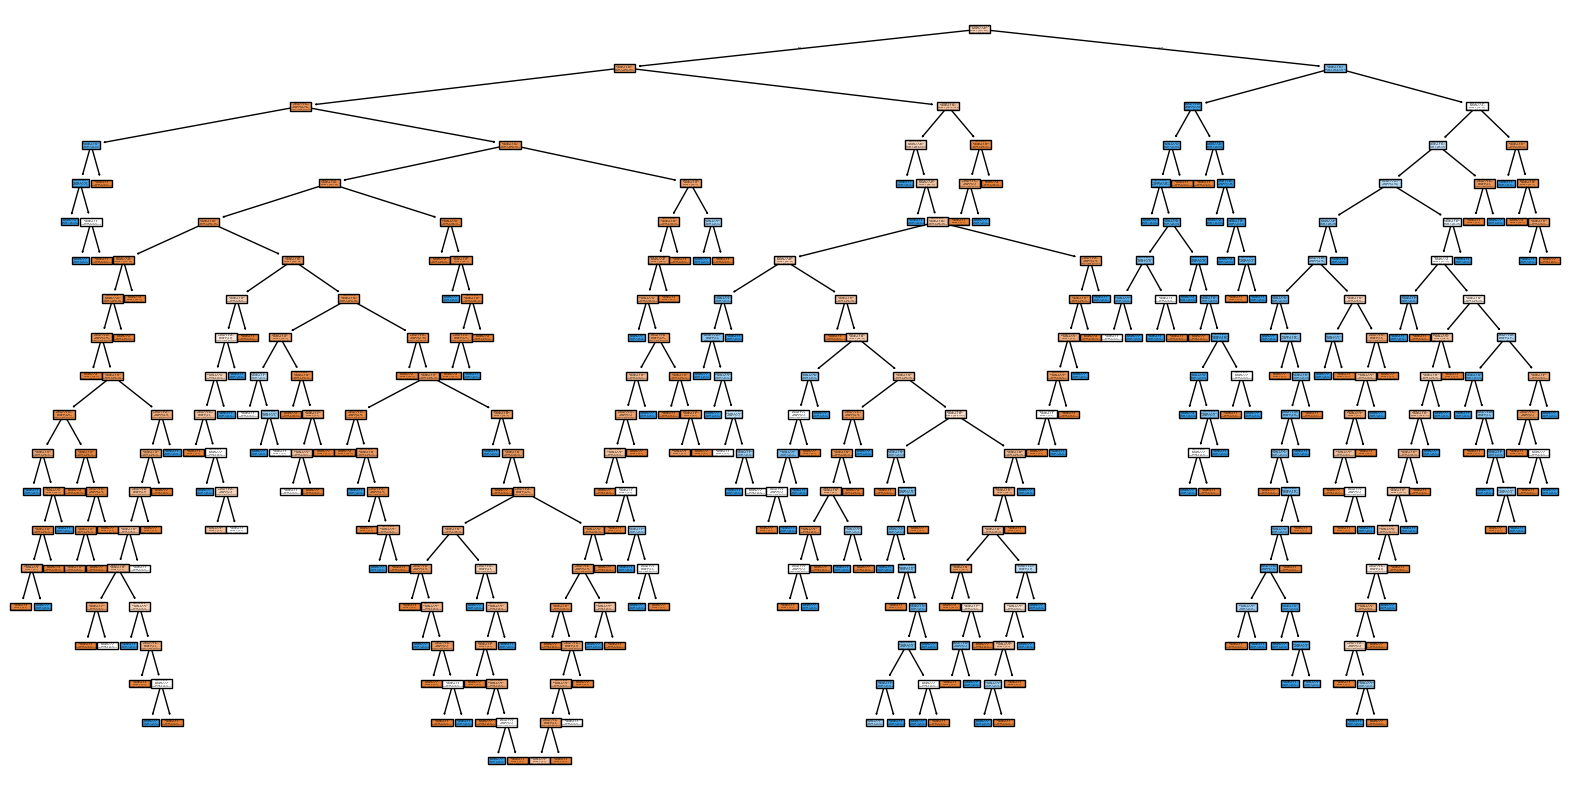

In [53]:
# Draw the desion tree
plt.figure(figsize=(20,10))
plot_tree(clf, 
          feature_names=dvec.feature_names_,   # Feature Name
          class_names=["Not Survived", "Survived"],   # Category Name
          filled=True   # Set fill color
          )

# Save as png
plt.savefig("./Outputs/decision_tree_sklearn.png", format='png')

# display
plt.show()